In [ ]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng()
import random

In [ ]:
df = pd.read_csv("Padalko_LR1_WeatherData.csv")
df.rename(columns = {df.columns[0]: "date"}, inplace = True)
df["date"]= pd.to_datetime(df["date"])
df.head()

,date,temperature,atmpressure,relhumidity,illuminance
0,2022-01-01 00:00:00,-0.432882,973.683914,85.372272,35694.444444
1,2022-01-01 00:30:00,-0.267199,973.689238,85.287472,35694.444444
2,2022-01-01 01:00:00,-0.102225,973.694533,85.203035,35694.444444
3,2022-01-01 01:30:00,0.061333,973.699777,85.119322,35694.444444
4,2022-01-01 02:00:00,0.222774,973.704946,85.036693,35694.444444


Text(0.5, 1.0, 'Сгенерированная температура воздуха в Ростове-на-Дону')

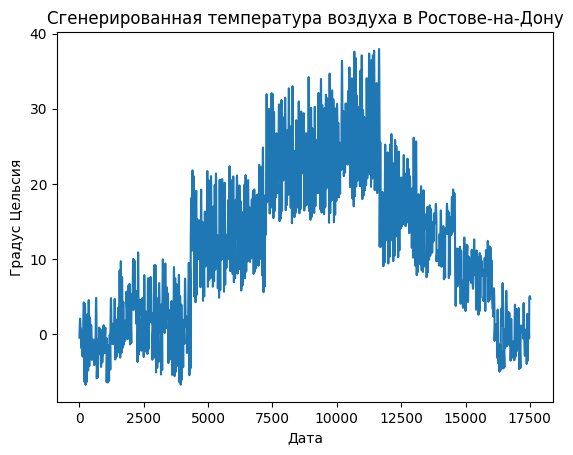

In [ ]:
plt.plot(df["temperature"], label = "Средняя температура за полчаса")
plt.xlabel("Дата")
plt.ylabel("Градус Цельсия")
plt.title("Сгенерированная температура воздуха в Ростове-на-Дону")

Text(0.5, 1.0, 'Сгенерированное атмосферное давление в Ростове-на-Дону')

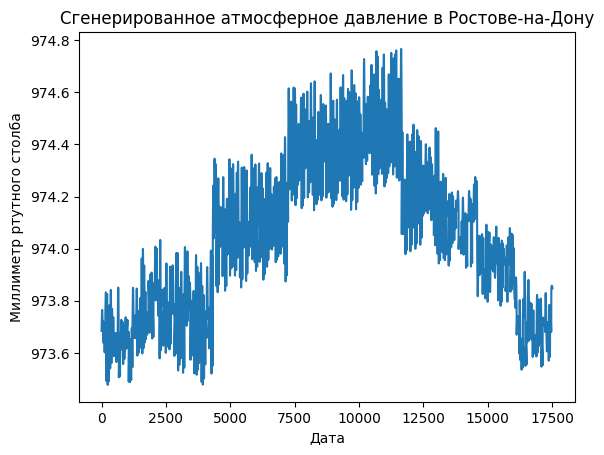

In [ ]:
plt.plot(df["atmpressure"], label = "Среднее атмосферное давление за полчаса")
plt.xlabel("Дата")
plt.ylabel("Миллиметр ртутного столба")
plt.title("Сгенерированное атмосферное давление в Ростове-на-Дону")

Text(0.5, 1.0, 'Сгенерированная относительная влажность воздуха в Ростове-на-Дону')

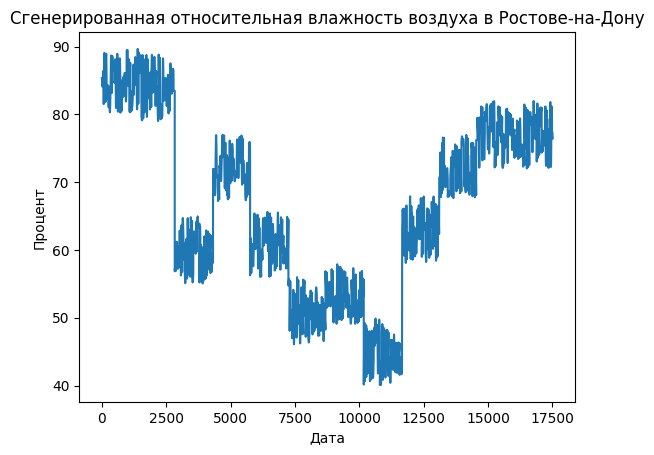

In [ ]:
plt.plot(df["relhumidity"], label = "Средняя относительная влажность воздуха за полчаса")
plt.xlabel("Дата")
plt.ylabel("Процент")
plt.title("Сгенерированная относительная влажность воздуха в Ростове-на-Дону")

Text(0.5, 1.0, 'Сгенерированная освещённость в Ростове-на-Дону')

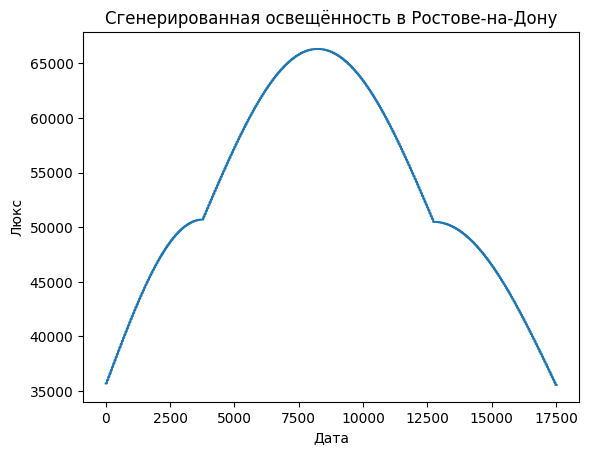

In [ ]:
plt.plot(df["illuminance"], label = "Средняя освещённость")
plt.xlabel("Дата")
plt.ylabel("Люкс")
plt.title("Сгенерированная освещённость в Ростове-на-Дону")

In [ ]:
df_corrupted = df.copy(deep = True)
df_corrupted["temperature"] = df_corrupted["temperature"]*9.0/5.0+32.0 #Перевод из Цельсия в Фаренгейт.
df_corrupted["atmpressure"] = df_corrupted["atmpressure"]*101325.0/760.0 #Перевод мм. рт. ст. в Паскали.
df_corrupted.head()

,date,temperature,atmpressure,relhumidity,illuminance
0,2022-01-01 00:00:00,31.220813,129813.845541,85.372272,35694.444444
1,2022-01-01 00:30:00,31.519043,129814.555366,85.287472,35694.444444
2,2022-01-01 01:00:00,31.815995,129815.261300,85.203035,35694.444444
3,2022-01-01 01:30:00,32.110399,129815.960337,85.119322,35694.444444
4,2022-01-01 02:00:00,32.400993,129816.649514,85.036693,35694.444444


In [ ]:
def GenerateValuesForList(l, value, min_amount, max_amount):
  min_amount = int(min_amount)
  max_amount = int(max_amount)
  min_amount = min(len(l), min_amount)
  max_amount = min(len(l), max_amount)
  n = rng.integers(min_amount, max_amount)
  if n <= 0:
    return l
  l_mask = [False]*len(l)
  for i in range(n):
    l_mask[i] = True
  random.shuffle(l_mask)
  for i in range(len(l)):
    if l_mask[i]:
      l[i] = value
  return l
for column_name in df_corrupted:
  if column_name == "date":
    continue
  column_list = GenerateValuesForList(df_corrupted[column_name].to_list(), 1000, 30, 70)
  column_list = GenerateValuesForList(column_list, np.NaN, int(len(column_list)*0.05), int(len(column_list)*0.15))
  df_corrupted[column_name] = column_list
d1 = dt.datetime(2022, rng.integers(1, 13), 1)
d2 = d1+relativedelta(months = 1, hours = -1)
mask = (df_corrupted["date"] >= d1) & (df_corrupted["date"] <= d2)
df_corrupted.loc[mask, "temperature"] = df_corrupted.loc[mask, "temperature"].multiply(-1)
df_corrupted.loc[mask, "atmpressure"] = df_corrupted.loc[mask, "atmpressure"].multiply(-1)
df_corrupted.loc[mask, "relhumidity"] = df_corrupted.loc[mask, "relhumidity"].multiply(-1)
df_corrupted.loc[mask, "illuminance"] = df_corrupted.loc[mask, "illuminance"].multiply(-1)

In [ ]:
df_corrupted.describe()

,temperature,atmpressure,relhumidity,illuminance
count,15311.000000,16522.000000,16556.000000,15660.000000
mean,43.620055,107380.042475,60.986306,42838.054716
std,65.896054,72666.043258,60.789058,32408.098703
min,-1000.000000,-129958.190465,-1000.000000,-62746.397901
25%,34.340021,129820.903176,56.102072,43020.833333
50%,50.262912,129857.107634,67.565443,50169.619857
75%,64.878547,129888.441079,77.117211,60872.139487
max,1000.000000,129947.263957,1000.000000,66319.444444


In [ ]:
df_corrupted.to_csv("Padalko_LR1_WeatherData_Corrupted.csv")
df_corrupted.head()

,date,temperature,atmpressure,relhumidity,illuminance
0,2022-01-01 00:00:00,31.220813,129813.845541,85.372272,35694.444444
1,2022-01-01 00:30:00,31.519043,129814.555366,85.287472,35694.444444
2,2022-01-01 01:00:00,31.815995,129815.261300,85.203035,35694.444444
3,2022-01-01 01:30:00,32.110399,129815.960337,85.119322,35694.444444
4,2022-01-01 02:00:00,32.400993,129816.649514,85.036693,35694.444444
